<a href="https://colab.research.google.com/github/mahalingamagesthian/learningai/blob/main/7_Agentic_LangGraph_YT_LangGraph_ReAct_Pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference:

https://www.youtube.com/watch?v=pEMhPBQMNjg&list=PL8motc6AQftlE8U8IQrftOUyzI_00PObk

https://langchain-ai.github.io/langgraph/concepts/why-langgraph/

This pip install command sets up a complete environment for building a `LangGraph` agent that leverages OpenAI's models and can perform web searches using `DuckDuckGo`. It pulls in all the foundational `LangChain` components, the core `LangGraph` orchestration engine, the specific connector for `OpenAI`, and a practical tool for your agent to use.

This combination allows you to build agents that can:

 1. Understand complex prompts.
 2. Decide which actions to take.
 3. Use a search engine to find information.
 4. Reason over the results.
 5. And potentially loop or retry based on a dynamic graph of operations.


# Install Relevant Libraries


 Let's break down each part of that pip install command, explaining its role in the LangGraph/LangChain ecosystem,

## langchain-core

**Role:** This is the foundational library of the LangChain ecosystem. It contains the core abstractions and base classes that underpin almost everything in LangChain and LangGraph.

**What it provides:**
 * `Base interfaces`: Defines fundamental concepts like `BaseLLM` (for language models), `BasePromptTemplate` (for prompts), `BaseOutputParser` (for structured output), `BaseTool` (for tools that agents use), and `BaseMemory`(for conversational memory).
 * `Runnables`: The LangChain Expression Language (LCEL) is built on top of langchain-core's runnables, which allow you to compose chains and pipelines in a flexible and efficient way.
 * `Callbacks` : The mechanism for monitoring and observing your LLM application's execution.

**`Why you need it`**:
Without langchain-core, you wouldn't have the fundamental building blocks to define and interact with any LLM component in a standardized way. It's the absolute base layer.


## langchain-community

**Role**: This library provides integrations with a vast array of third-party providers and utilities. It houses the concrete implementations of the abstract interfaces defined in `langchain-core`.

**What it provides**:
* `Specific LLM integrations`: While `langchain-openai` (see next) handles OpenAI, `langchain-community` provides integrations for many other LLMs like Hugging Face Hub (as discussed before), Anthropic, Cohere, Google Gemini, etc.
* `Document loaders`: Classes to load data from various sources (PDFs, websites, databases, CSVs).
* `Vector stores`: Integrations with vector databases (e.g., Chroma, FAISS, Pinecone) for RAG (Retrieval Augmented Generation).
* `Tools`: Implementations for common tools an agent might use (e.g., `DuckDuckGoSearchRun` which is pulled in by `duckduckgo-search` but often conceptually part of `langchain-community`'s tool ecosystem).

**Why you need it**: It provides the specific "pluggable parts" that allow your `LangChain/LangGraph` application to interact with external services, load data, and use various models beyond just OpenAI.


## langgraph

**Role:** This is the specialized library for building stateful, multi-actor, and highly controllable agentic applications using a graph-based approach. As we discussed earlier, it extends LangChain's capabilities for complex workflows.

**What it provides:**
* `Graph Abstraction`: Allows you to define `nodes` (steps in your agent's thought process) and `edges` (transitions between steps).
* `State Management` : Built-in mechanisms to manage and update a shared application state as the agent moves through the graph.
* `Cycles & Conditionals`: Enables sophisticated control flow, including loops (for retries or iterative refinement) and conditional branching.
* `Human-in-the-loop`: Facilitates adding human intervention points.

**`Why you need it`**:  LangGraph is precisely what you need to orchestrate more complex, autonomous behaviors that go beyond simple sequential chains.

## langchain-openai

**Role**: This is a specific integration package that provides the classes and methods for interacting with OpenAI's Large Language Models (LLMs) and Chat Models via their API.

**What it provides:**
* Implementations for `OpenAI` (for text completion models like text-davinci-003) and `ChatOpenAI` (for chat models like gpt-3.5-turbo, gpt-4).
* Tools that might specifically leverage OpenAI's APIs.

**`Why you need it`**: If your Agentic AI model (or any part of it) uses OpenAI models for its reasoning, generation, or tool calls, this package is essential for connecting to their API.

## duckduckgo-search

**Role**: This is a Python library that provides a programmatic way to perform web searches using `DuckDuckGo's` search engine.

**What it provides:**
* Functions to send queries to DuckDuckGo and parse the search results.

**Why you need it**: In the context of an agent, a search tool is incredibly common. Agents often need to look up real-world information that isn't contained in their training data or memory. This package provides the "tool" that your `LangGraph` agent can use to perform a web search.

In [1]:
!pip -q install langchain-core langchain-community langgraph langchain-openai duckduckgo-search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 12.7 MB/s eta 0:00:00


## LangGraph ReAct Function Calling Pattern

- Search

- Math

---



## Traditional ReAct


react_prompt = """Assistant is a large language model trained by Microsoft.

Assistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

Assistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide range of topics.

Overall, Assistant is a powerful tool that can help with a wide range of tasks and provide valuable insights and information on a wide range of topics. Whether you need help with a specific question or just want to have a conversation about a particular topic, Assistant is here to assist.

TOOLS:
------

Assistant has access to the following tools:

wikipedia_search - searches the wikipedia database for the answer\n
web_search - searches the web for the answer\n
calculator - calculates the answer to the question\n
weather_api - gets the weather for the location\n


To use a tool, please use the following format:

```
Thought: Do I need to use a tool? Yes
Action: the action to take, should be one of [wikipedia_search, web_search, calculator, weather_api]
Action Input: the input to the action
Observation: the result of the action
```

When you have a response to say to the Human, or if you do not need to use a tool, you MUST use the format:

```
Thought: Do I need to use a tool? No
Final Answer: [your response here]
```

Begin!


New input: Whow was King Arthur?
"""

# Importing OPEN API Key

This small code snippet is crucial for securely managing your API keys, especially when working in environments like Google Colab.

1. `import os`

* `os module`: This is a built-in Python module that provides a way of using operating system-dependent functionality. It allows you to interact with the underlying operating system.

* `Key Functionality`: One of its primary uses is to interact with environment variables. Environment variables are dynamic named values that can affect the way running processes behave. They are part of the operating system's environment.

* `Why it's needed here`: We'll use `os.environ` to set an environment variable, which is a standard and secure way to pass sensitive information (like API keys) to applications without hardcoding them directly into the code.

2. `from google.colab import userdata`

* `google.colab`: This module is specific to the Google Colaboratory environment. Colab is a free cloud-based Jupyter notebook environment that runs on Google's infrastructure.
* `userdata`: This is a sub-module within `google.colab` that provides a secure way to store and retrieve sensitive user data, such as API keys, directly within your Colab environment.
* `Significance`: Instead of hardcoding your OPENAI_API_KEY directly into your notebook (which is a major security risk, especially if you share the notebook), Colab's `userdata` module allows you to store it securely. When you use `userdata.get('OPENAI_API_KEY')`, Colab retrieves the value you previously saved in its **secrets manager**.

3. os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

* `userdata.get('OPENAI_API_KEY')`: This part fetches the value of the secret named OPENAI_API_KEY that you have securely stored in your Google Colab **"Secrets"** tab.
* `How to store it in Colab`:
  * In your Google Colab notebook, look for a key icon on the left sidebar (usually towards the bottom, often labeled "Secrets" or "Keys").
  * Click on it.
  * Click "Add new secret".
  * For "Name", type OPENAI_API_KEY (case-sensitive).
  * For "Value", paste your actual OpenAI API key (the one you obtained from the OpenAI platform).
  * Make sure the "Notebook access" toggle is ON for the current notebook.

`os.environ['OPENAI_API_KEY'] = ...`: This line takes the API key retrieved from `userdata.get('OPENAI_API_KEY')` and sets it as an environment variable within the Python process where your notebook is running.
`Why an environment variable`? Many libraries, including `langchain-openai`, are designed to automatically look for API keys in environment variables (e.g., OPENAI_API_KEY). By setting it this way, you don't have to explicitly pass the key to every function call; the library will find it automatically. This is a common and secure pattern for managing credentials in applications.

In essence, this block of code is performing a critical security and configuration step:

It retrieves your sensitive OpenAI API key from a secure, Colab-specific storage mechanism (`userdata`) and then makes it available to your Python application (and libraries like LangChain) by setting it as an environment variable. This prevents you from exposing your API key in your public code or committing it to version control systems like `Git`, which is a fundamental security best practice in software development.

In [3]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')


# Connecting to OpenAI
Establishes a connection (or at least prepares to connect) to OpenAI's API. Specifies that you intend to use the gpt-4o model.
Creates an llm object which is now a callable interface. You can pass a `HumanMessage` (or a list of messages) to this llm object, and it will send that request to OpenAI's `gpt-4o model`, then return the model's response.

# `from langchain_openai import ChatOpenAI`:

* `langchain_openai`: This is a specific Python package within the larger LangChain ecosystem.`langchain_openai` is its dedicated integration module for interacting with OpenAI's APIs.
ChatOpenAI: This is a specific class provided by the langchain_openai package.
 * `Purpose`: It's designed to interface with OpenAI's "chat models". These are models optimized for multi-turn conversations and often perform better for dialogue-based tasks, instruction following, and complex reasoning (e.g., gpt-3.5-turbo, gpt-4, gpt-4o).
 * `Contrast with OpenAI class`: There's also an OpenAI class in langchain_openai which is typically used for older "completion" models (like text-davinci-003) that take a single prompt and generate a completion. For modern LLM applications, ChatOpenAI is generally preferred as it uses the more capable chat completion APIs.

* `llm = ChatOpenAI(model="gpt-4o"):`

  * `llm variable`: This is a common naming convention in LangChain to refer to an "Large Language Model" instance. It's an object that represents your connection to a specific LLM.
  * `ChatOpenAI(...)`: This is the constructor call to create an instance of the ChatOpenAI class.
  * `model="gpt-4o"`: This is a crucial argument passed to the constructor. It specifies which particular OpenAI chat model you want to use for this instance.

`gpt-4o (GPT-4 Omni)` is OpenAI's latest flagship model at the time of writing, known for its advanced capabilities in understanding and generating text, vision, and soon, audio.
If you wanted to use a different model, like gpt-4-turbo or gpt-3.5-turbo, you would change this string.




In [12]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

### Tools
In the next step because it introduces the concept of tools for your AI agent. In LangChain and LangGraph, agents often don't just rely on their language model's internal knowledge; they can use external functions or APIs to perform specific tasks.

These are just three standard Python function definitions. They implement basic arithmetic operations:

1. multiply(a: int, b: int) -> int:

* Takes two integer inputs (a and b).
* Returns their product as an integer.
* The """Docstring""" explains what the function does, its arguments, and their types. This docstring is crucially important for LangChain/LangGraph.
2. add(a: int, b: int) -> int:

* Takes two integer inputs (a and b).
* Returns their sum as an integer.
3. divide(a: int, b: int) -> float:

* Takes two integer inputs (a and b).
* Returns their quotient as a floating-point number. Note the  float return type, which is important for division.

**Significance in the context of LangChain/LangGraph and Agentic AI:**

The comment `# This will be a tool` is the most important clue here. These simple Python functions are being prepared to be exposed as `"tools"` to your Large Language Model (LLM) agent.

**How LLMs use tools:**

1. `Tool Definition`: In LangChain/LangGraph, you'll convert these Python functions into a `Tool` object (usually using create_tool or tool decorator).
2. `Tool Description`: The `docstrings ("""Multiply a and b...""")` of these functions are absolutely critical. `LangChain` will extract these docstrings and present them to the LLM as a "description" of what the tool does, its arguments, and their types.
3. `LLM Reasoning`: When your agent (powered by `gpt-4o` in your case) receives a user query (e.g., "What is 50 divided by 5, plus 10?"), it will:
* `Analyze the query`: It understands that it needs to perform mathematical operations.
* `Consult its available tools`: It looks at the descriptions of the multiply, add, and divide tools you've given it.
* `Decide which tool to use`: Based on its training and the tool descriptions, it "decides" that divide is appropriate for "50 divided by 5".
* `Format the tool call`: It generates a structured output (often in a specific JSON format) telling the framework to call the divide tool with a=50 and b=5.

4. `Tool Execution`: The `LangChain/LangGraph` framework intercepts this structured output, calls your actual Python divide function with the specified arguments.
5. `Result Observation`: The framework then takes the result (10.0 in this case) and feeds it back to the LLM as "observation."
6. `Further Reasoning`: The LLM then sees the observation ("The division result is 10.0") and can continue its reasoning (e.g., "Now I need to add 10 to 10.0, so I'll call the add tool").

# Why expose functions as tools?

* `Overcoming LLM Limitations`: While LLMs are great at text generation, they are not reliable calculators. They can "hallucinate" math results. By giving them explicit calculator tools, you leverage their strong language understanding for reasoning and tool selection, and the tool's deterministic accuracy for computation.
* `Accessing External Capabilities:` Tools are how LLMs can "interact with the world" beyond their training data. This includes:
  * Searching the web (`duckduckgo-search`).
  * Accessing databases.
  * Calling external APIs (e.g., weather APIs, stock APIs).
  * Running code interpreters.
* `Extensibility`: You can extend your agent's capabilities simply by writing a new Python function and exposing it as a tool.

These three simple Python functions are the foundation of external capabilities for your AI agent. They represent the "skills" or "actions" that your intelligent agent can perform by making precise, controlled calls to code, rather than trying to perform those operations itself purely through text generation.

In [5]:

def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

This code snippet introduces a very practical and common type of tool an AI agent might need: **a search engine**.

1.`# search tools`

This is a comment, indicating that the following code is related to setting up search functionalities, which are indeed a type of tool for an agent.

2.`from langchain_community.tools import DuckDuckGoSearchRun`

 * `langchain_community.tools`: `langchain_community` is where many third-party integrations and concrete implementations of tools reside. `tools` is a sub-module specifically for various types of tools that can be given to LLMs.
 * `DuckDuckGoSearchRun`: This is a specific class provided by `langchain_community` that implements a web search tool using the `DuckDuckGo` search engine.
  * `Purpose`: It encapsulates the logic required to send a query to `DuckDuckGo`, receive the search results, and format them in a way that an LLM can easily consume as an `"observation."`

3. `search = DuckDuckGoSearchRun()`

This line creates an instance of the `DuckDuckGoSearchRun` class.
The search variable now holds an object that represents the `DuckDuckGo` search tool. This object is ready to be used.
`search.invoke("How old is Brad Pitt?")`

4. `search.invoke(...)`: This is the core action. In `LangChain (and especially in LangGraph)`, `invoke` is the standard method used to execute a runnable or a tool.
5. `"How old is Brad Pitt?"`: This is the input to the invoke method, which in this case is the search query you want to send to `DuckDuckGo`.

## What this code does in simple terms:

This code effectively acts as a direct call to the `DuckDuckGo` search engine through a convenient `LangChain` wrapper. It performs the following sequence of operations:

 * Initializes the `DuckDuckGo` search tool.
 * Sends the query `"How old is Brad Pitt?"` to the `DuckDuckGo` search engine.
 * Waits for `DuckDuckGo` to return its search results.
 * Processes these results: `DuckDuckGoSearchRun` will typically extract relevant snippets or summaries from the search results.
 * Returns the processed search results: The output of search.invoke(...) will be a string containing information found by `DuckDuckGo` for the given query.

## Significance for an Agentic AI model:

This search tool is a prime example of how an LLM agent **gains access to real-time, external information**.

 * `Bridging Knowledge Gaps`: An LLM's internal knowledge is limited to its training data, which can become outdated. By providing a search tool, the agent can look up current events, specific facts, or detailed information it doesn't already know.
 * `Problem-Solving`: When faced with a question it can't answer directly from its internal knowledge, an intelligent agent can decide to use the search tool, process the search results, and then formulate a comprehensive answer or decide on its next action.
 * `Tool Calling`: In an actual agent implementation (especially with `LangGraph`), the LLM wouldn't directly call `search.invoke()`. Instead, the LLM would `"decide"` (based on its prompt and the tool's description) that it needs to perform a search, generate a structured `"tool call" (e.g., tool_name="duckduckgo_search", input="how old is brad pitt")`, and the LangChain/LangGraph framework would then intercept that call and execute the `search.invoke()` for it. The result would then be passed back to the LLM.

 This snippet demonstrates a *fundamental building block for giving your AI agent the ability to act on and retrieve information from the outside world*.

In [6]:
# search tools
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

search.invoke("How old is Brad Pitt?")

"The 60-year-old Pitt portrays Nick, ... Brad Pitt was born William Bradley Pitt on December 18, 1963, in Shawnee, Oklahoma. The eldest of three children in a devoutly Southern Baptist family, Brad ... Brad Pitt has commented publicly for the first time on the contentious and lengthy divorce proceedings he went through after separating from ex-wife Angelina ... The 61-year-old star responded ... Brad Pitt (born December 18, 1963, Shawnee, Oklahoma, U.S.) is an American actor known for his portrayal of unconventional characters. After gaining attention for his role in Thelma & Louise (1991), Pitt channeled his magnetism as a leading man in such movies as A River Runs Through It (1992) and Legends of the Fall (1994) but avoided being ... Zahara Marley Jolie-Pitt was born on Jan. 8, 2005, in Hawassa, Ethiopia, and was adopted by Jolie when she was seven-months-old. Jolie initially visited Zahara's orphanage with Maddox after he had ... Brad Pitt's net worth: Mostly from his acting career,

 This is a crucial step in preparing your Language Model (LLM) to become an `"agent"` that can use external functionalities. It's where you formally tell your `gpt-4o` model instance about the tools it has at its disposal.

 1. tools = [add, multiply, divide, search]

 * `tools variable`: This line simply creates a standard Python list.
 * `[add, multiply, divide, search]`: This list contains the actual Python function objects `(add, multiply, divide )` and the `DuckDuckGoSearchRun` object (search) you initialized.
 * It's important to note that these are the functions themselves and the tool instance, not just their names as strings.

**What this line does**: It gathers all the individual functions and tool instances that you want your LLM to be able to use into a single collection.

2. llm_with_tools = llm.bind_tools(tools)

 * `llm`: This refers to the `ChatOpenAI` instance you created earlier `(llm = ChatOpenAI(model="gpt-4o"))`. This `llm` object is capable of communicating with the `gpt-4o` model via OpenAI's API.

 * `.bind_tools(tools)`: This is the core operation. It's a method provided by `LangChain's` LLM objects (specifically, `ChatOpenAI` in this case).

 * **Purpose**: This method takes a list of tools  and "binds" them to the language model.
 * **How it works (internally)**: When you call bind_tools, LangChain doesn't actually give the code of your add, multiply, divide, or search functions directly to gpt-4o. Instead, it does something very clever:
    1. `Extracts Tool Schemas`: It inspects each function/tool in the tools list. For your Python functions (add, multiply, divide), `LangChain` uses their docstrings (the `"""Add a and b.""" part) and type hints (a: int, b: int -> int)` to automatically generate a structured description of what the tool does, its name, and its expected input parameters (including their types).
    2. For the `search` tool (which is already a `LangChain` Tool object), it already has this structured description built-in.
    3. `Passes as System/Tool Prompt`: When you later make a call to `llm_with_tools`, `LangChain` will automatically inject these generated tool descriptions into the system message or a specific tool prompt that it sends to the gpt-4o model. This tells the LLM: "Hey, when you're thinking about how to respond, here are some external functions/tools you can call, and here's how to call them."
    4. `Enables Function Calling`: Modern LLMs like gpt-4o are fine-tuned for "function calling" or "tool use." This means they can respond not just with natural language but also with a structured output (e.g., JSON) that indicates a tool call.
 * `llm_with_tools`: This new variable holds a new LLM object that is essentially the original llm but now "aware" of the tools. When you send a query to `llm_with_tools`, it knows that it can use these tools, and if it decides to, it will output a structured tool call instead of just a natural language response.

 **In essence, this line of code is performing the critical setup that allows your gpt-4o model to transition from being just a text generator to an intelligent agent capable of interacting with external functionalities. It's the process of giving your LLM "skills" by describing the tools it has available.**

Now, when you use `llm_with_tools` in your agent's workflow, the LLM will be prompted not only to answer the user's question but also to consider if calling `add, multiply, divide, or search` would help it arrive at a better answer or perform a necessary action.

In [13]:
tools = [add, multiply, divide, search]

llm_with_tools = llm.bind_tools(tools)

This LangGraph Agent code defines the initial state and the persona of your AI assistant.

# Understanding the Imports
1. `from langgraph.graph import MessagesState:`

  * `langgraph.graph`: This is the core module within the `LangGraph` library where the fundamental building blocks for creating graphs are defined.
  * `MessagesState`: This is a specific type of state that `LangGraph` provides out-of-the-box. When you build a graph, you need to define what kind of information (or "state") your agent will maintain and pass between its different steps (nodes). `MessagesState` is designed for conversational agents. It automatically manages a list of `BaseMessage` objects (like `HumanMessage`, `AIMessage`, `SystemMessage`), which is the standard way `LangChain` represents conversational turns.
  * `Significance`: By using `MessagesState`, your agent will naturally keep track of the conversation history, allowing it to respond contextually and remember previous interactions. This is essential for any assistant that needs to hold a conversation.

2. `from langchain_core.messages import HumanMessage, SystemMessage`:

 * `langchain_core.messages`: This module from `langchain-core` defines the different types of messages that can be part of a conversation with an LLM.
 * `HumanMessage`: Represents a message from the user (or human).
 * `SystemMessage`: Represents a message that sets the context or persona for the AI model. It's like whispering instructions to the AI about how it should behave.
 * `AIMessage (not imported here but commonly used)`: Represents a message from the AI.
 * `Significance`: These classes standardize how conversational turns are represented, making it easy for `LangChain` and `LangGraph` components to process and respond to them.

# Decoding the System Message
 * `sys_msg = SystemMessage(content="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.")`

   * `sys_msg variable`: This simply stores an instance of a SystemMessage.

   * `SystemMessage(...)`: We're creating a system message object.

   * `content="...":` This is the actual text of the system message.

   * `"You are a helpful assistant...":` This sets the persona and tone of your AI agent. The LLM will try to adhere to this persona in its responses.
   * `"...tasked with using search..."`: This explicitly tells the LLM that one of its primary responsibilities is to use a `search` tool. This primes the LLM to consider using the `search` tool you've bound to it whenever it encounters a query that might require external information.
   * `"...and performing arithmetic on a set of inputs."`: This instructs the LLM that it should also use its arithmetic tools `(add, multiply, divide)` when appropriate. This reinforces its ability and expectation to perform calculations.

# Significance of the System Message:

The system message is incredibly powerful in controlling the behavior and capabilities of your LLM agent. It acts as a high-level directive that guides the model's responses and decision-making process. By explicitly stating its role and the tools it should use, you significantly improve the chances that the LLM will correctly identify when to invoke `search, add, multiply, or divide` rather than trying to answer queries based solely on its internal knowledge (which, as we know, can sometimes be inaccurate for specific facts or calculations).

In [8]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.")



let's dive into this next piece of code, which defines a core `"node"` in your `LangGraph` agent. This is where the actual `"thinking"` or `"reasoning"` of your AI agent happens, powered by the LLM.

# Understanding LangGraph Nodes
In `LangGraph`, a node is a step or a function within your agent's workflow graph. Each node takes the current state of the application as input, performs some computation, and then returns an update to that state.

## Breaking Down the reasoner Function
1. `def reasoner(state: MessagesState)`:

 * `def reasoner(...)`: This defines a Python function named `reasoner`. In `LangGraph`, functions like this are often registered as nodes in your graph.
 * `MessagesState`: This is the input parameter to the `reasoner` function. `state` represents the current state of your agent's execution. The type hint `MessagesState` tells us that this specific node expects the state to be of the `MessagesState` type, which means it will contain a list of `BaseMessage` objects (like `HumanMessage, SystemMessage, AIMessage, ToolMessage`). When `LangGraph` calls this node, it automatically passes the current graph's state to it.
2. `return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}`

* This entire line is what the `reasoner node` does. It performs a computation and then returns an update to the graph's state.
* `state["messages"]:` This accesses the list of messages from the current graph state. Since we're using `MessagesState`, the state dictionary will have a key named `"messages"` that holds the conversation history.
  * `[sys_msg] + state["messages"]`:
This is a crucial part. It constructs the complete list of messages that will be sent to the LLM.
  * `[sys_msg]:` This is a list containing only your `SystemMessage` ("You are a helpful assistant tasked with using search and performing arithmetic...").
  * `+ state["messages"]`: This concatenates the `SystemMessage` with the existing conversation history from the state.
  * `Significance`: By always including the `SystemMessage` at the beginning of the message list sent to the LLM, you ensure that the LLM consistently remembers its persona and instructions throughout the conversation. This prevents it from `"forgetting"` its role or the tools it has over multiple turns.

* `llm_with_tools.invoke(...):`
This is where your `gpt-4o` model instance (which is now "aware" of its tools) is actually called.
It takes the combined list of messages `(system message + conversation history)` as input.
The invoke method sends this message list to the OpenAI API.
* `Expected Output:` Since `llm_with_tools` was `bind_tools`-ed, the `gpt-4o` model has two primary ways it can respond:
  * `Natural Language (AIMessage)`: If it decides it has enough information to answer directly, it will return an `AIMessage` containing its textual response.
  * `Tool Call (AIMessage with tool_calls)`: If it decides it needs to use one of the bound tools (like add, multiply, divide, or search), it will return an `AIMessage` that contains a `tool_calls` attribute. This `tool_calls` attribute will be a list of structured objects indicating which tool to call and with what arguments.

* `{"messages": [...]}:` The `reasoner` function returns a dictionary. `LangGraph` expects nodes to return a dictionary where the keys correspond to the keys in your graph's state (in this case, `"messages"`). The values are then used to update the state. By returning `{"messages": [...]}` with the LLM's response inside, you are appending the LLM's latest `AIMessage` (whether it's a textual response or a tool call) to the existing messages list in the graph's state. LangGraph's `MessagesState` automatically handles this appending.

## Nodes

In [9]:
# Node
def reasoner(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}


### Building the graph

This block of code is where the magic of `LangGraph` really comes together to form an Agentic AI workflow. You're effectively building a simple `ReAct (Reason-Act)` agent here, which is a foundational pattern in the field.

1. `Imports: Setting the Stage `
* `from langgraph.graph import START, StateGraph`:
 * `StateGraph`: This is the fundamental class from `LangGraph ` used to define your state machine. You instantiate it with the type of state your graph will manage (`MessagesState` in our case, which manages a list of messages).
 * `START`: A special constant in `LangGraph` that represents the initial entry point into your graph. Any execution of the graph begins from START.
* `from langgraph.prebuilt import tools_condition # this is the checker for the if you got a tool back:`
 * `tools_condition`: This is a pre-built utility function provided by `LangGraph`. Its purpose is to act as a conditional router. It inspects the output of the preceding node (which in our case is the reasoner's response from the LLM) and checks if that response contains a tool call.
   * If the LLM's response indicates a tool call, tools_condition will return a specific string (often "tools") that tells the graph to transition to the tools node.
   * If the LLM's response is a final answer (i.e., no tool call), `tools_condition` will return a string like `"__end__"` (representing the END state), causing the graph to stop.
* `from langgraph.prebuilt import ToolNode`:
  * `ToolNode`: This is another pre-built node provided by `LangGraph`. It's specifically designed to execute the tools that an LLM has decided to call.
   * It takes a list of tool objects (like our `add, multiply, divide, search` functions) as its argument.
   * When this node is activated, it looks at the tool calls generated by the LLM, finds the corresponding tool in its list, executes it, and returns the tool's output back into the graph's state (often as a `ToolMessage`).
* `from IPython.display import Image, display`:
These are utility functions from `IPython` (which Jupyter notebooks use) for displaying rich output, like images. We'll use this to visualize the graph structure.

2. `Graph Initialization (builder = StateGraph(MessagesState))`
* `builder = StateGraph(MessagesState)`: This creates an instance of `StateGraph`. We're telling `LangGraph` that our entire workflow will operate on a state that is structured like `MessagesState` (i.e., it will primarily manage a list of messages representing the conversation history).

3. `Adding Nodes (builder.add_node(...))`
* `builder.add_node("reasoner", reasoner):`
 * This adds a node to our graph.
 * `"reasoner"`: This is the name we're giving to this node within our graph. It's a string identifier.
 * `reasoner`: This refers to the Python function reasoner that you defined earlier. This function encapsulates the logic where the LLM (`llm_with_tools`) receives the current state and generates a response (either a direct answer or a tool call). This is the `"Reason"` step in ReAct.

* `builder.add_node("tools", ToolNode(tools)):`

 * `"tools"`: The name for this node.
 * `ToolNode(tools)`: This creates an instance of the `ToolNode ` and passes it our tools list (`[add, multiply, divide, search]`). When this node is executed, it will run the actual tool requested by the LLM. This is the "Act" step in `ReAct`.

4. `Adding Edges: Defining the Workflow Logic`
Edges define how the execution flows between nodes in the graph.

* `builder.add_edge(START, "reasoner"):`

  * This adds a direct, unconditional edge from the START point of the graph to the `"reasoner"` node.
  * `Meaning`: When the graph execution begins (e.g., when a new user query comes in), the first thing it does is go to the reasoner node to let the LLM think.

* `builder.add_conditional_edges("reasoner", tools_condition):`

  * This is the most critical part for building an agent. It adds conditional transitions from the `"reasoner"` node.
  * `"reasoner"`: The starting node for this conditional edge.
  * `tools_condition`: This is the function that will be called. It takes the output of the `"reasoner"` node as input.
* How it works:
After the `reasoner` node finishes, `tools_condition` is invoked.
  * If reasoner's output (the LLM's response) is an `AIMessage` that contains `tool_calls`, then `tools_condition` will return the name of the `"tools"` node (implicitly, usually `"tools"` by default for `ToolNode`). This means the graph will transition to the `"tools"` node to execute the requested tool.
  * If reasoner's output is an `AIMessage` that is a final answer (no `tool_calls`), then `tools_condition` will return END (or __end__). This tells the graph that the agent has finished its task for this turn, and the execution stops.
* `Meaning`: This effectively creates a decision point: Did the LLM decide it needs to use a tool, or did it provide a final answer?

* `builder.add_edge("tools", "reasoner"):`

  * This adds a direct, unconditional edge from the `"tools" ` node back to the `"reasoner"` node.
  * `Meaning`: After a tool has been executed (by the `"tools" ` node), the result of that tool execution (an `"observation"`) is added to the state. The graph then immediately transitions back to the `"reasoner"` node. This allows the LLM to observe the result of the tool call and then reason again, deciding if it needs another tool call, if it can now answer, or if it needs to try something else. This creates the `"Reason-Act-Observe-Reason"` loop of the `ReAct` pattern.
5. `Compiling the Graph (react_graph = builder.compile())`
 * `react_graph = builder.compile()`:
   * After you've defined all your nodes and edges using the builder object, you `compile()` the graph.
   * Purpose: The `compile()` method performs several optimizations and checks. It essentially "finalizes" the graph structure, making it ready for execution. It also creates a runnable object (`react_graph`) that you can then invoke with your inputs to start the agent's workflow.

6. `Displaying the Graph (display(Image(react_graph.get_graph(xray=True).draw_mermaid_png())))`

 * `react_graph.get_graph(xray=True):` This method generates an internal representation of your graph. xray=True often helps in visualizing more details about the graph's internal workings, including what conditions are being evaluated.
 * `.draw_mermaid_png():` This method takes the graph representation and generates a Mermaid.js diagram (a text-based diagramming tool) and then renders it as a PNG image.
 * `display(Image(...)):` This takes the generated PNG image and displays it directly in your Jupyter notebook output.
 * `Purpose:` This is incredibly useful for debugging and understanding your agent's control flow. You can visually inspect the paths your agent can take and confirm that your nodes and edges are connected as intended.

# In a Nutshell: The ReAct Pattern

This entire graph setup implements a fundamental `ReAct `(Reason-Act) agent pattern:

1. `Reason (by reasoner node)`: The LLM looks at the current conversation (and system instructions/tools) and decides what to do next. It either:
  * Provides a final answer.
  * Decides to use a tool.
  * `Act` (by tools node): If a tool is decided, the tools node executes it.
  * `Observe` (implicitly through state update): The result of the tool is added back to the conversation state.
  * Reason Again (loop back to reasoner): The LLM then sees the new observation and uses it to continue its thought process, potentially calling another tool or finally providing an answer.
  * This loop continues until the LLM provides a final answer, at which point the `tools_condition` routes to END. This architecture allows for powerful, iterative problem-solving by the agent.



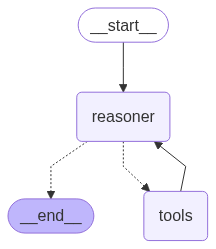

In [10]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition # this is the checker for the if you got a tool back
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Add nodes
builder.add_node("reasoner", reasoner)
builder.add_node("tools", ToolNode(tools)) # for the tools

# Add edges
builder.add_edge(START, "reasoner")
builder.add_conditional_edges(
    "reasoner",
    # If the latest message (result) from node reasoner is a tool call -> tools_condition routes to tools
    # If the latest message (result) from node reasoner is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "reasoner")
react_graph = builder.compile()

# Display the graph
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

Here actually run your newly built LangGraph agent
1. `messages = [HumanMessage(content="What is 2 times Brad Pitt's age?")]`
 * `messages` variable: This line initializes a Python list named messages.
 * `[HumanMessage(content="What is 2 times Brad Pitt's age?")]`: This creates a single element within the messages list.
  * `HumanMessage(...)`: This is an instance of the `HumanMessage` class from `langchain_core.messages`. It represents a single message coming from a human user.
  * `content="..."`: This is the actual text of the user's query or instruction.
**What this line does**: It sets up the initial input to your agent. This is the very first thing the user asks your AI assistant. It's a question that clearly requires both a search (to find Brad Pitt's age) and a mathematical operation (multiplication).

2. `messages = react_graph.invoke({"messages": messages})`

 * `react_graph:` This refers to the compiled `LangGraph` object that you built in the previous step. It contains all the nodes (reasoner, tools) and edges (the flow logic) that define your agent's behavior.
 * `.invoke(...)`: This is the method used to execute a compiled `LangChain` Runnable or, in this case, a `LangGraph`. When you invoke a graph, you're kicking off its execution.
 * `{"messages": messages}`: This is the input to the invoke method.
  * `LangGraph` expects its input to match the structure of the `StateGraph` it was initialized with. Since you built `builder = StateGraph(MessagesState)`, the graph expects a dictionary with a key named `"messages"`.
The value associated with `"messages"` is the list of `HumanMessage` that you just created. This sets the initial state of the graph.

# The full execution flow
This single line triggers the entire agentic process you've defined:

1. `Graph Start (START -> reasoner)`: The `react_graph` begins execution. The initial state `{"messages": [HumanMessage(...)]}` is passed to the reasoner node.
2. `Reasoner's First Turn (reasoner node):`
  * The reasoner function takes the state (which now contains `[HumanMessage("What is 2 times Brad Pitt's age?")])`.
  * It constructs the full prompt for the LLM: `[SystemMessage(...)] + [HumanMessage(...)]`.
  * It calls `llm_with_tools.invoke()` with this prompt.
  * The `gpt-4o` model receives the instruction and the user's question. It processes it. Since it needs Brad Pitt's age, and it knows about the search tool, it will likely generate a tool call in its response, something like: `tool_code("search", {"query": "Brad Pitt's age"})`.
  * The reasoner node then returns this `AIMessage` (which contains the tool call) to update the graph's state.

3. `Conditional Edge (reasoner -> tools):`

  * After the reasoner node completes, the `tools_condition` is evaluated.
  * It sees that the `AIMessage` from the reasoner contains a `tool_calls` attribute. Therefore, `tools_condition` routes the execution to the "tools" node.
4. Tools Node Execution (`tools node`):

  * The ToolNode receives the `AIMessage` with the search tool call.
  * It extracts the tool name (`search`) and arguments `("Brad Pitt's age")`.
  * It then executes the actual `DuckDuckGoSearchRun` instance with that query.
  * `DuckDuckGo` performs the search and returns results (e.g., "Brad Pitt is 60 years old as of Dec 18, 1963").
  * The `ToolNode` wraps this search result into a `ToolMessage` and adds it to the graph's state.
5. Loop Back to `Reasoner (tools -> reasoner)`:

  * After the tools node finishes, the graph unconditionally moves back to the "reasoner" node.
6. Reasoner's Second Turn (reasoner node again):

* The `reasoner` function now takes the updated state. This state contains:
  * The original `SystemMessage`.
  * The `HumanMessage` ("What is 2 times Brad Pitt's age?").
  * The `AIMessage` from the first reasoner turn (containing the search tool call).
  * The `ToolMessage` (containing the search result: "Brad Pitt is 60 years old...").
* The `gpt-4o` model now sees the original question AND the result of the search.
* It will then likely decide to use the multiply tool. It generates another tool call: tool_code("multiply", {"a": 2, "b": 60}).
* The reasoner returns this `AIMessage` to update the state.

7. `Conditional Edge (reasoner -> tools)`:

 * `tools_condition` is evaluated again.
 * It sees the new `AIMessage` with the multiply tool call.
Routes execution to the "tools" node again.

8. Tools Node Execution (tools node again):

 * The `ToolNode` executes the multiply function with a=2 and b=60.
 * The multiply function returns 120.
This result is wrapped into a ToolMessage and added to the state.
9. Loop Back to Reasoner (`tools -> reasoner`):

  * Unconditionally moves back to the reasoner node.
10. Reasoner's Final Turn (reasoner node again):

 * The reasoner function takes the state, which now contains all previous messages and the `ToolMessage` with the 120 result.
 * The `gpt-4o` model sees the original question and the result of the multiplication. It now has all the information to answer directly.
 * It generates a final `AIMessage` with the answer: "Brad Pitt is 60 years old, so 2 times his age is 120." (or something similar).
 * The reasoner returns this final `AIMessage`.
11. `Conditional Edge (reasoner -> END):`

* `tools_condition` is evaluated one last time.
* It sees that the final `AIMessage` does not contain any `tool_calls.`
Therefore, `tools_condition` routes the execution to END. The graph stops.

12. `Return Value`: The `react_graph.invoke(...)` call returns the final state of the graph, which is a dictionary containing the complete list of messages `(all HumanMessage, SystemMessage, AIMessages, and ToolMessages)` that were exchanged during the execution. By assigning it back to the messages variable, you capture the entire conversation history and the agent's thought process.

This single line of code orchestrates a sophisticated, multi-step reasoning and action process for your AI agent!


In [14]:
messages = [HumanMessage(content="What is 2 times Brad Pitt's age?")]
messages = react_graph.invoke({"messages": messages})

# What This Code Does
 1. `for m in messages['messages']:`:

  * `messages`: This refers to the variable where you stored the final state returned by `react_graph.invoke()`. Remember, when the graph finishes running, it returns a dictionary representing its final state.
  * `messages['messages']`: Since your `StateGraph` was configured with `MessagesState`, the graph's state dictionary will have a key named `'messages'`. The value associated with this key is the complete list of all messages that were exchanged during the agent's entire execution `(System, Human, AI, and Tool messages, in chronological order)`.
  * `for m in ...`: This initiates a simple Python for loop. It iterates through each individual `message (m)` in that ordered list of messages.

2. `m.pretty_print()`:

 * `m`: In each iteration of the loop, m is an instance of a `LangChain BaseMessage` subclass (e.g., `HumanMessage, AIMessage, ToolMessage, SystemMessage`).
 * `.pretty_print()`: This is a convenient method provided by these `LangChain` message objects. Its purpose is to output the message content to the console in a formatted, readable way, often with different colors or prefixes to distinguish between Human, AI, System, and Tool messages.

# Significance for Agentic AI
This simple loop is incredibly important for *observability and debugging* your agent:

 * `Understanding Agent Thought Process`: When an agent performs multiple steps (like searching for Brad Pitt's age, then multiplying it), a direct `print(messages)` would give you a raw Python object. `pretty_print()` allows you to see the entire sequence of thoughts and actions taken by your agent:
  * What was the initial human query?
  * What tools did the AI decide to call?
  * What were the results of those tool calls?
  * What was the AI's final answer?
 * `Debugging`: If your agent isn't behaving as expected, `pretty_print()` provides a detailed trace. You can see exactly what prompt the LLM received at each step, what tool calls it attempted, and what observations it made. This helps you identify if:
    * The LLM misinterpreted your instructions.
    * The tool was called incorrectly.
    * The tool returned an unexpected result.
    * The LLM failed to incorporate the tool's result into its final answer.

  * `User Experience (for developers)`: While not for end-users, for developers, this is a quick and effective way to review the agent's "internal monologue" and verify its execution flow.

This code block takes the complex, multi-turn interaction that just happened inside your LangGraph agent and presents it in a clear, step-by-step format, allowing you to easily understand how your AI arrived at its conclusion.

In [15]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 2 times Brad Pitt's age?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_lXfiZKEKGQX1RlF767QyXRfa)
 Call ID: call_lXfiZKEKGQX1RlF767QyXRfa
  Args:
    query: Brad Pitt age
================================= Tool Message =================================
Name: duckduckgo_search

Actor Brad Pitt is known the movies 'Fight Club,' 'The Curious Case of Benjamin Button,' and 'Moneyball.' Read about his age, girlfriend, children, and more. Brad Pitt is an American actor known for his portrayal of unconventional characters. He channeled his magnetism as a leading man in Legends of the Fall (1994) but avoided being typecast by playing offbeat characters. ... December 18, 1963, Shawnee, Oklahoma, U.S. (age 61) (Show more) Founder: Make It Right Not on Our Watch (Show more) Awards ... Brad Pitt: Net Worth, Age, Height & Everything You Need

## More manual way and adding a custom tool

* `!pip -q install`

  * `!`: This is a "shell escape" character used in Jupyter Notebooks or IPython environments (like Google Colab, which you've been using). It tells the environment to run the following command as a regular command-line instruction, not as Python code. If you were in a standard terminal, you'd just type pip.
  * `pip`: This is Python's standard package installer. It's the primary tool used to install, upgrade, and manage software packages (libraries) written in Python from the Python Package Index (PyPI) or other package indexes.
  * `-q`: This is a "quiet" flag. It tells pip to install the package without printing a lot of detailed progress information to your console. This keeps your output cleaner, showing only essential messages or errors.

* `yahoo-finance`:

 * This is the name of the Python package you want to install.
 this library allows your Python code to:

   * Access financial data from Yahoo Finance. This typically includes:
   * Historical stock prices (open, high, low, close, volume).
   * Current stock quotes.
   * Company information.
   * Other financial metrics.

In [16]:
!pip -q install yahoo-finance

  Preparing metadata (setup.py) ... done


This is a great step because now creating a custom tool for your Agentic AI to interact with real-world data (stock prices).

1. `import yfinance as yf`
 * `yfinance`: This is a popular and very useful Python library that allows you to easily download historical and real-time market data from Yahoo Finance. Remember the `!pip install yahoo-finance` command you ran? This is the line that actually brings that installed library into your Python script.
 * `as yf`: This is just a common Python alias. Instead of typing `yfinance` every time you want to use something from the library, you can just type yf. It makes your code shorter and easier to read.

`What it does`: This line makes all the functions and capabilities of the `yfinance` library available for you to use in your code.

2. `def get_stock_price(ticker: str) -> float`:
  * `def get_stock_price(...)`: This defines a new Python function named `get_stock_price`. This is the function that will become one of your AI agent's "skills" or "tools."
  * `ticker: str`: This specifies that the `get_stock_price`  function expects one input, named ticker, and that this input should be a string (text). A "ticker" is the short symbol used to identify a company's stock (e.g., "AAPL" for Apple, "GOOG" for Google, "TCS.NS" for TCS on NSE).
  * `-> float`: This is a `"type hint"` for the return value. It tells us that this function is expected to return a floating-point number (a number with decimals), which makes sense for a stock price.

3. `The Docstring (The AI's Instruction Manual)`
 * This block of text enclosed in triple quotes ("""...""") is called a docstring.
 * `Why it's crucial for Agentic AI`: When you `"bind"` this function as a tool to your Language Model (like `gpt-4o`), `LangChain` (and `LangGraph`) will read this docstring. It's like giving your AI agent a miniature instruction manual for this specific tool.
   * The first line ("Gets a stock price from Yahoo Finance.") tells the AI what the tool does in simple language.
   * `The Args`: section ("ticker: ticker str") tells the AI what inputs the tool needs and what kind of information those inputs are.
 * The Commented-Out Line `(# """This is a tool for getting the price of a stock when passed a ticker symbol""")`: This is just a commented-out line. It's likely an older version of the docstring or a note from the developer. Only the uncommented docstring (the one above it) will be read by `LangChain` as the tool's description.

 **What the docstring does**: It acts as the descriptive metadata that the LLM uses to understand when to use this tool and how to call it (what arguments to provide).

 4. The Function Body: How the Tool Works
 * `stock = yf.Ticker(ticker):`
   * This is the first line of code that actually does something.
   * `yf.Ticker(ticker)` creates a `Ticker` object from the yfinance library. You give it the ticker symbol (like "AAPL"), and this object then knows how to go fetch data for that specific stock.

 * `return stock.info['previousClose']:`
   * `stock.info`: The `Ticker` object has an info attribute, which is a dictionary containing a lot of fundamental information about the stock (company name, industry, various financial metrics, etc.).
   * `['previousClose']`: We are specifically accessing the value associated with the key `'previousClose'` from that info dictionary. This gives us the closing price of the stock from the previous trading day.
   * `return`: This sends the retrieved stock price back as the output of the `get_stock_price` function.

**What it does**: This part of the code makes an actual request to Yahoo Finance, retrieves information for the given stock ticker, and extracts the previous day's closing price.

# Significance for Agentic AI (Bridging to your Agent)

This `get_stock_price` function is a perfect example of a custom tool that your AI agent can now use:

 * `Providing a "Skill"`: Just like you taught your agent to add, multiply, divide, and search, you're now giving it the new `"skill"` to `get_stock_price`.
 * `LLM's Role`: When a user asks your agent a question like, `"What was Apple's stock price yesterday?"` or `"Compare Google's stock price with Microsoft's today,"` your `gpt-4o` model will:
    * Read the query.
    * Look at the descriptions of all the tools you've bound to it (including the `get_stock_price` docstring).
    * `"Decide"` that `get_stock_price` is the right tool for `"Apple's stock price."`
    * Generate a `"tool call"` telling `LangGraph` to run `get_stock_price` with `ticker="AAPL"`.
 * `Execution`: `LangGraph` intercepts that tool call, runs your actual Python function `get_stock_price("AAPL")`.
 * `Observation`: The result (e.g., 175.25) is then sent back to the LLM as an "observation."
 * Further Reasoning: The LLM now has this piece of real-world data and can use it to answer the user's question, perhaps combine it with other information, or even use another tool (like divide if the user asked for a ratio of stock prices).

In [17]:
import yfinance as yf

def get_stock_price(ticker: str) -> float:
    """Gets a stock price from Yahoo Finance.

    Args:
        ticker: ticker str
    """
    # """This is a tool for getting the price of a stock when passed a ticker symbol"""
    stock = yf.Ticker(ticker)
    return stock.info['previousClose']

In [18]:
get_stock_price("AAPL")

203.92

In [ ]:
# from langchain_community.tools.yahoo_finance_news import YahooFinanceNewsTool

# y_finance = YahooFinanceNewsTool()

# y_finance.invoke("AAPL")

# What this reasoner function does (step-by-step):
This function acts as the core `"thinking"` or `"reasoning"` node in your `LangGraph` agent. It's where your LLM (`gpt-4o`) receives the current situation, decides what to do, and generates a response.

1. `def reasoner(state)`:

* This defines the function `reasoner`. In `LangGraph`, this function will be called as a "node" in your graph.
* `state`: This is the input to the node. It's a dictionary that holds the current "memory" or "context" of your agent's ongoing task. When LangGraph runs, it passes the current state to this node.
2. `query = state["query"]`

* This line expects that the state dictionary now contains a key named `"query"`.
* This `"query"` key is where the current user's prompt or question is stored.
* `Significance`: This is a change from how we might have initialized the messages list directly in the previous invoke call. Now, the main user query for the current turn is explicitly passed in the state via the `"query"` key.

3. `messages = state["messages"]`

 * This line retrieves the existing conversation history from the state dictionary.
 * Remember, this messages list will contain all the previous interactions (system messages, previous human inputs, AI responses, tool calls, and tool outputs).

4. `sys_msg = SystemMessage(content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs.")`

  * This line re-defines the `SystemMessage` every time the reasoner node runs.
  * `Crucial Update`: The content of this `SystemMessage` has been updated to explicitly tell the LLM that it is "tasked with using... the yahoo finance tool". This is how your gpt-4o model knows that it now has the `get_stock_price` function available as a tool, in addition to search and arithmetic.
  * Why define it here? While often defined once globally, defining it within the node ensures it's always included and can theoretically be made dynamic based on other parts of the state if needed (though it's static here).

5. `message = HumanMessage(content=query)`
This line takes the query (the current user input) that was extracted from the state and wraps it into a `HumanMessage` object.

6. `messages.append(message)`

This is a  important step. The newly created `HumanMessage` (containing the user's current question) is added to the messages list.
`Significance`: This ensures that the LLM sees the latest user input as part of the overall conversation history that is about to be sent to it.

7. `result = [llm_with_tools.invoke([sys_msg] + messages)]`

This is the core communication with your `gpt-4o` model.

 * `[sys_msg] + messages`: This creates the complete prompt that is sent to the LLM for this turn. It starts with the `SystemMessage` (setting the persona and capabilities) and then adds the entire chronological list of messages (previous conversation + current user query).
 * `llm_with_tools.invoke(...)`: This sends the combined prompt to your gpt-4o model.
 * What gpt-4o returns:
   * If it has a final answer, it returns an `AIMessage` with its textual response.
   * If it decides it needs to use a tool (e.g., `search, add, multiply, divide, or now get_stock_price`), it returns an `AIMessage` that contains a `tool_calls` attribute, specifying which tool to call and with what arguments (e.g., `tool_calls=[ToolCall(name='get_stock_price', args={'ticker': 'AAPL'})]`).
   * `result = [...]`: The LLM's response (`AIMessage`) is wrapped in a list and stored in the result variable.
8. `return {"messages":result}`

This line returns a dictionary to `LangGraph`.
  * `{"messages": ...}`: This tells `LangGraph` to update the `"messages"` key in the graph's state.
  * `result`: The result (which is the single `AIMessage` from the LLM's current turn) is used to update the messages list in the global graph state. LangGraph's `MessagesState` intelligently handles appending this new message to the existing list.

**In Summary:** The `reasoner` node's updated function:
This reasoner function is the brain of your agent. For every turn that your agent needs to think or respond, this node runs:

  * It takes the latest user input and the entire conversation history from the current state.
  * It combines these with a clear instruction (`SystemMessage`) to the `gpt-4o` model, explicitly telling it about all the tools it can use (search, arithmetic, and now Yahoo Finance).
  * It sends this complete context to `gpt-4o`.
  * It then takes `gpt-4o's` response (either a direct answer or a decision to use a tool) and updates the conversation history within the graph's state.

This reasoner node, combined with the conditional logic you set up in your graph (`tools_condition`), enables the agent to iteratively `"reason"` (call the LLM), `"act"` (execute a tool if needed), and then `"observe"` the tool's output to `"reason"` again, forming a powerful cycle for solving complex problems.


In [19]:
# Node
def reasoner(state):
    query = state["query"]
    messages = state["messages"]
    # System message
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs.")
    message = HumanMessage(content=query)
    messages.append(message)
    result = [llm_with_tools.invoke([sys_msg] + messages)]
    return {"messages":result}


1. tools = [add, multiply, divide, search, get_stock_price]

  * `tools variable`: This line re-defines (or updates) the tools list that your agent has access to.
  * `[add, multiply, divide, search, get_stock_price]`: You'll notice that the `get_stock_price` function (the one you just created that fetches stock prices from Yahoo Finance) has now been added to the end of this list.
  * `add, multiply, divide`: Your arithmetic tools.
  * `search`: Your web search tool (`DuckDuckGo`).
  * `get_stock_price`: Your brand-new stock price fetching tool.

`What this line does`: This is the explicit step where you tell your Agentic AI framework, "Here's the complete set of all the external skills/functions my AI agent can use."

2. `llm = ChatOpenAI(model="gpt-4o")`
  * `llm variable`: This line re-creates a fresh instance of your `ChatOpenAI` object, which is your connection to the gpt-4o model.
  * **Why repeat this?**  You might wonder why you're creating `llm` again. In some setups, especially when you're iteratively building and testing, it's common to re-initialize the core LLM object to ensure you're working with a clean instance before binding new tools or changing configurations. It simply makes sure that the `llm` variable points to a brand-new connection to gpt-4o.
  * **What this line does:** It ensures you have a clean, ready-to-use interface to the powerful gpt-4o language model from OpenAI.

3. `llm_with_tools = llm.bind_tools(tools)`

  * `llm_with_tools variable`: This line is creating a new version of your `llm` object, now "aware" of its capabilities.
  * `llm.bind_tools(tools)`: This is the crucial step, similar to what we discussed before, but now with an expanded set of tools.
  * `LangChain` takes the llm object and "teaches" it about each and every tool in the updated tools list.
  * For each tool (`add, multiply, divide, search, get_stock_price`), `LangChain` extracts its structured description (from the docstrings and type hints, or the tool's internal definition for `DuckDuckGoSearchRun`).

These descriptions are then used to inform the gpt-4o model. When you send a query to llm_with_tools later, LangChain will automatically inject these tool descriptions into the prompt sent to gpt-4o.

**What this line does** : It updates your gpt-4o instance's "understanding" of what external actions it can perform. Now, if a user asks a question like "What's the current price of TCS stock?" the `gpt-4o` model will look at its internal instructions and the descriptions of all its tools, and realize that `get_stock_price` is the perfect tool for that job. It will then generate a request to call that tool.

# Overall Significance
This entire block of code is about upgrading your Agentic AI's capabilities. You've added a new, specialized skill `(get_stock_price)` to its toolbox. By re-binding the tools to your LLM, you ensure that the gpt-4o model is fully aware of all its available actions and can intelligently decide when to use each of them to respond to user queries or perform tasks.

This is a fundamental part of building intelligent agents: progressively giving them more and more specific tools to interact with various data sources and APIs in the real world.

In [22]:
tools = [add, multiply, divide, search, get_stock_price]

llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

In [23]:
tools[4]

<function __main__.get_stock_price(ticker: str) -> float>

We are getting into the core of how LangGraph manages the "memory" and "context" of your AI agent! This piece of code defines the structure of the graph's state, which is essentially the shared memory or blackboard that all the nodes in your agent's workflow can read from and write to.

1. Imports: Tools for Defining State

* `from typing import Annotated, TypedDict`:

  * `typing module`: This is a standard Python module that provides support for type hints.
  * `TypedDict`: This is a special type from the typing module. It allows you to define a dictionary with a fixed set of keys, where each key has an associated type. It's essentially a way to create a schema or a "typed dictionary" for your data structure.
  * `Significance for LangGraph`: `LangGraph` heavily relies on `TypedDict` to define the shape of its graph's state. This makes the state explicit, predictable, and easier to work with.
  * `Annotated`: This is a powerful feature introduced in Python 3.9 (or 3.8 with from __future__ import annotations). It allows you to add metadata to a type hint.
  * `Significance for LangGraph`: `LangGraph` uses Annotated to attach special instructions (like `operator.add`) to state fields, telling `LangGraph` how to combine updates to that field when multiple nodes modify it or when a node returns an update.
* `import operator`:
   * This built-in Python module provides functions that correspond to Python's operators (like +, -, *, ==).
   * `operator.add`: This specifically corresponds to the + operator.
   * `Significance for LangGraph`: When used with `Annotated`, `operator.add` tells `LangGraph`: "If a node returns an update for this state field, use the + operator to combine the new value with the existing value, rather than overwriting the old value." This is crucial for appending to lists.

* `from langchain_core.messages import AnyMessage`:

   * `AnyMessage`: This is a type hint from langchain_core that represents any type of LangChain message. This includes `HumanMessage, AIMessage, SystemMessage, ToolMessage, FunctionMessage`, etc.
   * `Significance`: It allows you to define a list that can contain all these different message types, which is exactly what a conversation history needs.

* `from langgraph.graph.message import add_messages`:

  * While imported here, `add_messages` is a utility function that `LangGraph` uses internally (or you could use manually) to handle the logic of appending messages.
  * The Annotated[..., operator.add] on the messages field in `GraphState` effectively configures `LangGraph` to use this `"add"` logic automatically when updates come in for the messages list.

2. `class GraphState(TypedDict)`: - Defining the Shared State Schema
  * This block defines your custom `GraphState`. Any variable that represents the current state of your `LangGraph` execution will conform to this dictionary structure.

  * """State of the graph.""": A docstring explaining the purpose of this class.
  * `query: str`:

    * `Type: str (string)`.
    * Purpose: This field is intended to hold the initial user input or the main query for the current run of your agent. Your reasoner function explicitly uses state["query"]. This is a clean way to pass the initial user's request into the graph.
  * `finance: str`:

    * Type: str (string).
    * Purpose: This is a new field! It's likely intended to store specific financial data or results that your agent fetches, perhaps using your get_stock_price tool. For example, after getting a stock price, a node might update state["finance"] with that price or a formatted summary of it. This separates the specific financial data from the general conversation history.
 * `final_answer: str`:

     * Type: str (string).
     * `Purpose`: This is another new field, crucial for agents. It's intended to store the ultimate, consolidated answer that your agent formulates after all its reasoning and tool-use steps. This allows you to extract the final, human-friendly response easily at the end of the graph's execution, rather than sifting through all the intermediate messages.
 * `# intermediate_steps: Annotated[list[tuple[AgentAction, str]], operator.add]`:

     * This line is commented out, meaning it's not active in your current graph state.
     * `Purpose (if active)`: If uncommented, this would be a common pattern for tracking the "thought process" of a more traditional Agent in LangChain. AgentAction represents the agent's decision to use a tool, and str would be the tool's output (observation). operator.add would ensure that new action-observation pairs are appended to this list. It's useful for debugging agent behavior.

 * `messages: Annotated[list[AnyMessage], operator.add]`:

     * `Type`: list[AnyMessage] (a list containing any type of LangChain message).
     * `Annotated[..., operator.add]`: This is where Annotated and operator.add are vital.
     * When a node (like your reasoner node) returns an update to the state that includes {"messages": [new_message]}, LangGraph sees this Annotated type with operator.add.
     * Instead of replacing the entire messages list with just [new_message], LangGraph uses operator.add to append [new_message] to the existing messages list in the state.
     * `Significance`: This is how your LangGraph automatically builds and maintains the entire conversation history. Every time a node processes something and generates a new message (AI response, tool call, tool observation), that message is seamlessly added to the messages list in the state, making the full context available to subsequent nodes (especially the reasoner).

# Overall Purpose of GraphState
This GraphState class acts as the central data model for your Agentic AI's workflow. It defines:

 * What information is available to each step (node) in your agent.
 * How that information is structured.
 * Crucially, how different updates from nodes are combined to form the evolving state (e.g., appending messages).

In [24]:
from typing import Annotated, TypedDict
import operator
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages


class GraphState(TypedDict):
    """State of the graph."""
    query: str
    finance: str
    final_answer: str
    # intermediate_steps: Annotated[list[tuple[AgentAction, str]], operator.add]
    messages: Annotated[list[AnyMessage], operator.add]



# Review of Imports (Same as before):

* `START, StateGraph` : Core `LangGraph` components for defining the entry point and the graph structure itself.
* `tools_condition`: The pre-built function that checks if the LLM's response is a tool call or a final answer, deciding the next step.
* `ToolNode`: The pre-built node that executes the actual tools chosen by the LLM.
1. `Graph Initialization with Custom State (workflow = StateGraph(GraphState))`

* `workflow = StateGraph(GraphState)`: This is the most significant change!
Previously, you might have used `StateGraph(MessagesState)`.
Now, you're explicitly telling `LangGraph` that the shared, mutable state that will be passed between all nodes in this workflow will conform to the structure defined by your `GraphState TypedDict`.
* What this means: Your state object inside each node will now consistently have query, finance, final_answer, and messages fields, and the messages field will automatically handle appending new messages thanks to Annotated and operator.add. This provides a more robust and extensible way to manage your agent's context than just a simple list of messages.

2. `Adding Nodes (workflow.add_node(...))`
This part is conceptually the same as before, but it's important to understand what each node does within the context of your custom GraphState:

 * `workflow.add_node("reasoner", reasoner)`:
Adds your reasoner function as a node named "reasoner".
    * `Role`: This is where your gpt-4o LLM, with all its tools, does its `"thinking."` It takes the current state (which now includes query, finance, messages, etc.), and produces a response that's either a final answer or a tool call. The reasoner function expects and uses the state["query"] and state["messages"].
 * `workflow.add_node("tools", ToolNode(tools))`:
     * Adds a pre-built `ToolNode` as a node named `"tools"`. You pass it the tools list (which now includes `get_stock_price`).
     * `Role`: If the reasoner decides to use a tool, execution moves here. This node will automatically look at the `tool_calls` generated by the LLM in the state, execute the correct tool, and add the tool's output back into the messages list in the state (as a `ToolMessage`).

3. `Adding Edges: Defining the Agent's Flow`

This section defines the flow of execution, creating the ReAct (Reason-Act) loop for your agent:

 * `workflow.add_edge(START, "reasoner")`:

    * `Meaning`: The agent's process always begins by going to the reasoner node. This means the LLM gets the first opportunity to process the initial user query (which will be part of the state passed to the graph when you invoke it).
 * `workflow.add_conditional_edges("reasoner", tools_condition)`:

   * `Meaning`: After the reasoner node has finished its `"thinking"` (i.e., `llm_with_tools.invoke()` has returned its response), `LangGraph` uses `tools_condition` to decide the next * step: If the LLM's response (AIMessage) contains a tool_calls attribute (meaning it wants to use a tool), tools_condition will route the execution to the "tools" node.
If the LLM's response is a final answer (no `tool_calls`), `tools_condition` will route the execution to the END of the graph, completing the current run.

* `workflow.add_edge("tools", "reasoner")`:

 * `Meaning`: After the "tools" node executes a tool and adds its output (the "observation") to the messages list in the state, the execution unconditionally moves back to the "reasoner" node.
 * `Why this loop`? This is fundamental to the ReAct pattern. It allows the LLM to observe the result of its action (the tool's output) and then reason again with this new information. It can then decide if it needs another tool call, if it can now answer the question, or if it needs to adjust its plan.

4. `Compiling the Graph (react_graph = workflow.compile())`
 * `react_graph = workflow.compile()`: This step takes your defined nodes and edges and compiles them into an executable graph. This compilation optimizes the graph and makes it ready for you to invoke it with inputs. `react_graph` is now your fully assembled Agentic AI.

5. `Displaying the Graph (display(Image(react_graph.get_graph(xray=True).draw_mermaid_png())))`
This part uses IPython's display utilities to generate and show a visual diagram of your graph.
 * `react_graph.get_graph(xray=True).draw_mermaid_png()`: This creates a Mermaid.js diagram (and converts it to a PNG image) that visually represents the nodes and the flow of edges, including the conditional logic.
 * `Significance`: This is incredibly helpful for visualizing and debugging your agent's complex multi-step reasoning process. You can clearly see how the agent moves from reasoning to acting (using tools) and back to reasoning, eventually reaching a final answer or needing more action.

 In essence, this entire block of code is where you're bringing all your pieces together. You're defining the architecture and control flow of your AI agent, telling it explicitly what its internal memory looks like (GraphState), what its "brain" does (reasoner node), what "actions" it can take (tools node), and how it makes decisions to move between thinking and acting (conditional_edges). This is the blueprint for your complex, problem-solving AI agent!



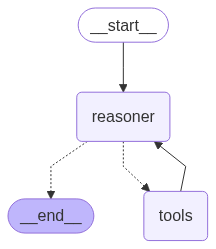

In [25]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition # this is the checker for the
from langgraph.prebuilt import ToolNode


# Graph
workflow = StateGraph(GraphState)

# Add Nodes
workflow.add_node("reasoner", reasoner)
workflow.add_node("tools", ToolNode(tools)) # for the tools

# Add Edges
workflow.add_edge(START, "reasoner")

workflow.add_conditional_edges(
    "reasoner",
    # If the latest message (result) from node reasoner is a tool call -> tools_condition routes to tools
    # If the latest message (result) from node reasoner is a not a tool call -> tools_condition routes to END
    tools_condition,
)
workflow.add_edge("tools", "reasoner")
react_graph = workflow.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

# The Full Agentic Flow Triggered by this Line (ReAct in Action):
When you run `response = react_graph.invoke(...)`, here's a detailed recap of what happens, keeping the `GraphState` in mind:

1. `Initial State`: The graph starts with `state = {"query": "What is 2 times Brad Pitt's age?", "messages": []}`.
2. `START to reasoner`: Execution flows to the reasoner node.
3. `reasoner (1st turn)`:
 * Reads `state["query"]`.
 * Reads `state["messages"]` (which is []).
 * Constructs the full message list for gpt-4o: `[SystemMessage(...), HumanMessage("What is 2 times Brad Pitt's age?")]`.
 * `llm_with_tools.invoke()` is called. gpt-4o recognizes the need for Brad Pitt's age.
 * gpt-4o responds with an AIMessage containing a tool call for search (e.g., search("Brad Pitt's age")).
 * The reasoner returns {"messages": [AIMessage_with_search_tool_call]}.
 * State Update: The AIMessage_with_search_tool_call is appended to state["messages"].

4. `reasoner -> tools_condition -> tools`: tools_condition sees the tool call and routes to the "tools" node.

5. `tools (1st turn)`:
  * Executes the search tool with the query "Brad Pitt's age".
  * Receives the search result (e.g., "Brad Pitt is 60 years old").
  * Creates a ToolMessage with this result.
  * The ToolMessage is appended to state["messages"].

6. `tools -> reasoner`: Execution loops back to the reasoner node.
7. reasoner (2nd turn):

  * Receives the updated state (now including the search result in messages).
  * Sends the entire history (SystemMessage, HumanMessage, AIMessage_with_search_tool_call, ToolMessage_with_search_result) to gpt-4o.
  * gpt-4o processes this. It sees the age and recognizes the "2 times" part.
  * gpt-4o responds with an AIMessage containing a tool call for multiply (e.g., multiply(a=2, b=60)).
  * The reasoner returns {"messages": [AIMessage_with_multiply_tool_call]}.
State Update: The AIMessage_with_multiply_tool_call is appended to state["messages"].

8. `reasoner -> tools_condition -> tools`: tools_condition sees the tool call and routes to the "tools" node.

9. `tools (2nd turn)`:
  * Executes the multiply tool with a=2, b=60.
  * Receives the result 120.
  * Creates a ToolMessage with this result.
  * The ToolMessage is appended to state["messages"].
10. `tools -> reasoner`: Execution loops back to the reasoner node.
11. `reasoner (3rd turn)`:
  * Receives the fully updated state (now including the multiplication result).
  * Sends the entire history to gpt-4o.
  * gpt-4o now has all the information. It formulates the final answer.
  * gpt-4o responds with an AIMessage containing the final textual answer (e.g., "Brad Pitt is 60 years old, so 2 times his age is 120."). Crucially, this AIMessage does not contain tool_calls.
  * The reasoner returns {"messages": [AIMessage_with_final_answer]}.
State Update: The AIMessage_with_final_answer is appended to state["messages"].

12. reasoner -> tools_condition -> END: tools_condition sees no tool calls and routes to END. The graph execution finishes.
13. Return Value: The response variable now holds the final GraphState dictionary, with messages containing the entire detailed interaction log.

This single invoke call beautifully demonstrates the power of LangGraph to manage complex, multi-step agentic workflows by leveraging a clearly defined, evolving state!

In [26]:
response = react_graph.invoke({"query": "What is 2 times Brad Pitt's age?", "messages": []})

In [27]:
response['messages'][-1].pretty_print()

================================== Ai Message ==================================

Brad Pitt is currently 61 years old. Therefore, 2 times his age is 122 years.


In [29]:
response = react_graph.invoke({"query": "What is the stock price of TCS?", "messages": []})

In [30]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the stock price of TCS?
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (call_xbnk6zEawm2daBMK8GmBf0CO)
 Call ID: call_xbnk6zEawm2daBMK8GmBf0CO
  Args:
    ticker: TCS
================================= Tool Message =================================
Name: get_stock_price

Error: KeyError('previousClose')
 Please fix your mistakes.
================================ Human Message =================================

What is the stock price of TCS?
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (call_xeiURc858TOO5Sp7MEIoZYhF)
 Call ID: call_xeiURc858TOO5Sp7MEIoZYhF
  Args:
    ticker: TCS
================================= Tool Message =================================
Name: get_stock_price

Error: KeyError('previousClose')
 Please fix your mistakes.
==============================

In [33]:
response = react_graph.invoke({"query": "What is the stock price of the company that Lip-Bu-Tan is CEO of?", "messages": []})

In [34]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the stock price of the company that Lip-Bu-Tan is CEO of?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_vOKnp9bx6Oo7AV6s7ERI3hyA)
 Call ID: call_vOKnp9bx6Oo7AV6s7ERI3hyA
  Args:
    query: Lip-Bu Tan CEO company
================================= Tool Message =================================
Name: duckduckgo_search

A message from Intel CEO Lip-Bu Tan to all company employees. April 24, 2025. Follow Intel Newsroom on Social Media: About Intel. Intel (Nasdaq: INTC) is an industry leader, creating world-changing technology that enables global progress and enriches lives. Inspired by Moore's Law, we continuously work to advance the design and manufacturing ... Frank D. Yeary, who took on the role of interim executive chair of the board during the search for a new CEO, will revert to being the independent chair of the board upon 

In [ ]:
response = react_graph.invoke({"query": "What will be the price of INTEL stock if it doubles?", "messages": []})

In [ ]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What will be the price of nvidia stock if it doubles?
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (call_8iPPMM261Ddgr4LdAlhQ4wW9)
 Call ID: call_8iPPMM261Ddgr4LdAlhQ4wW9
  Args:
    ticker: NVDA
================================= Tool Message =================================
Name: get_stock_price

119.1
================================ Human Message =================================

What will be the price of nvidia stock if it doubles?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uiTbfZ1pyR4TGayOPHXT1vZB)
 Call ID: call_uiTbfZ1pyR4TGayOPHXT1vZB
  Args:
    a: 11910
    b: 2
================================= Tool Message =================================
Name: multiply

23820
================================ Human Message =================================

What will be the pr

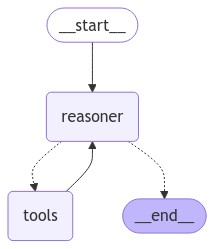

In [ ]:
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))